In [23]:
import numpy as np
import pandas as pd

from pulse2percept import electrode2currentmap as e2cm
from pulse2percept import effectivecurrent2brightness as ec2b

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# list of the stimulation values
s_file = pd.read_csv('../../data/Horsager_2011/DataSummary_Horsager2011.csv', skiprows=[1,2])
# list of the electrode locations
loc_file = pd.read_csv('../../data/Horsager_2011/DataSummary_Horsager2011.csv', nrows=2)

In [3]:
exp=['S05_A1_A2', 'S05_C1_D1', 'S05_C3_C2']

In [4]:
s_vals = s_file["Panel"]=='S05_A1_A2'

In [47]:
s_file

,Panel,Subject,delay (ms),E1,E2,pulse width,inter pulsewidth,Hz,A1,A2,...,B4,C1,C2,C3,C4,D1,D2,D3,D4,Mult of thresh
0,S05_A1_A2,S05,0.000,A1,A2,0.45,0.45,50,0.6379,0.8034,...,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0,0,0,3.0
1,S05_A1_A2,S05,0.075,A1,A2,0.45,0.45,50,0.0000,1.0000,...,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0,0,0,3.0
2,S05_A1_A2,S05,0.075,A1,A2,0.45,0.45,50,0.4279,0.9320,...,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0,0,0,3.0
3,S05_A1_A2,S05,0.375,A1,A2,0.45,0.45,50,0.4279,0.9612,...,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0,0,0,3.0
4,S05_A1_A2,S05,1.900,A1,A2,0.45,0.45,50,0.4231,0.9126,...,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0,0,0,3.0
5,S05_A1_A2,S05,9.000,A1,A2,0.45,0.45,50,0.4231,0.8883,...,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0,0,0,3.0
6,S05_A1_A2,S05,0.075,A1,A2,0.45,0.45,50,0.6875,0.7913,...,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0,0,0,3.0
7,S05_A1_A2,S05,0.375,A1,A2,0.45,0.45,50,0.6635,0.7573,...,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0,0,0,3.0
8,S05_A1_A2,S05,1.900,A1,A2,0.45,0.45,50,0.7308,0.8301,...,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0,0,0,3.0
9,S05_A1_A2,S05,9.000,A1,A2,0.45,0.45,50,0.7308,0.8252,...,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0,0,0,3.0


In [39]:
# for e in exp:
#     # find all rows that belong to experiment e
#     idx = s_file.Panel == e
#     s_vals=s_file[s_file["Panel"]==e]
#     for s in range(0, len(s_vals)):
#         e1=s_vals[s_file.E1[s]]

In [10]:
# pulse
freq = 20
ampl = 20
pulse_dur = .075/1000

# stimulus duration
tsample = .075/1000
dur = 0.5

In [11]:
s1 = e2cm.Psycho2Pulsetrain(freq=freq, dur=dur, 
                            pulse_dur=pulse_dur, interphase_dur=pulse_dur,
                            delay=0.,
                            tsample=tsample, current_amplitude=ampl, 
                            pulsetype='cathodicfirst')
                 
s2 = e2cm.Psycho2Pulsetrain(freq=freq, dur=dur, 
                            pulse_dur=pulse_dur, interphase_dur=pulse_dur,
                            delay=9/1000,
                            tsample=tsample, current_amplitude=ampl, 
                            pulsetype='cathodicfirst')

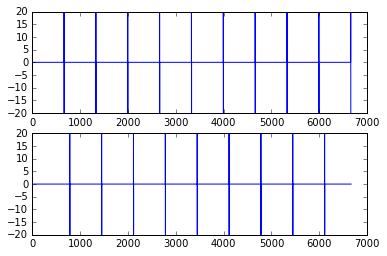

In [12]:
plt.subplot(211)
plt.plot(s1.data)

plt.subplot(212)
plt.plot(s2.data)

In [18]:
ea1 = e2cm.ElectrodeArray([250], [0], [0], [0])
ea2 = e2cm.ElectrodeArray([100, 100], [-200, 200], [200, -200], [0, 0])

In [20]:
r = e2cm.Retina(axon_map='../axon.npz')

In [33]:
ecs1, cs1 = r.electrode_ecs(ea1)
ecs2, cs2 = r.electrode_ecs(ea2)

In [34]:
tm = ec2b.TemporalModel(model='Nanduri')
R1 = ec2b.pulse2percept(tm, ecs1, r, [s1], 30)
R2 = ec2b.pulse2percept(tm, ecs2, r, [s2], 30)

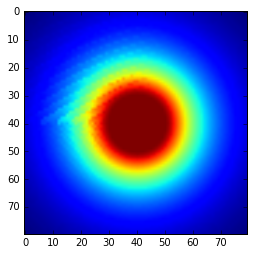

In [35]:
plt.imshow(R1.data[:, :, 100])

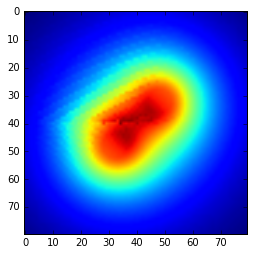

In [36]:
plt.imshow(R2.data[:, :, 100])